In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Adicionando Canal do DataSet (Channel do MNIST eh 1)
x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test),28,28, 1))


#x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1

x_train.shape



(60000, 28, 28, 1)

In [4]:

#
x_train.shape

#


(60000, 28, 28, 1)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

28

In [7]:
model = Sequential()

#Filters = IMG_width/2 * 7
model.add(Conv2D(98, #alterado de 168 para 98
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

#Filters = IMG_width/2 * 9
model.add(Conv2D(126, 
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

model.add(Conv2D(748, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))
model.add(Conv2D(392, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))
model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Flatten())
#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 98)        2548      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 98)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 49)          4851      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 49)          2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 49)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 126)         154476    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 126)         0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.02, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 51s 846us/step - loss: 1.6589 - acc: 0.3917 - val_loss: 0.4065 - val_acc: 0.8884
Epoch 2/200
60000/60000 [==============================] - 50s 825us/step - loss: 0.4489 - acc: 0.8656 - val_loss: 0.2075 - val_acc: 0.9503
Epoch 3/200
60000/60000 [==============================] - 50s 826us/step - loss: 0.2935 - acc: 0.9142 - val_loss: 0.1668 - val_acc: 0.9638
Epoch 4/200
60000/60000 [==============================] - 49s 820us/step - loss: 0.2334 - acc: 0.9326 - val_loss: 0.1561 - val_acc: 0.9666
Epoch 5/200
60000/60000 [==============================] - 49s 819us/step - loss: 0.1999 - acc: 0.9415 - val_loss: 0.1473 - val_acc: 0.9715
Epoch 6/200
60000/60000 [==============================] - 49s 823us/step - loss: 0.1781 - acc: 0.9489 - val_loss: 0.1459 - val_acc: 0.9726
Epoch 7/200
60000/60000 [==============================] - 49s 819us/step - loss: 0.1598 - acc: 0.9526 - val_l

60000/60000 [==============================] - 49s 823us/step - loss: 0.0430 - acc: 0.9872 - val_loss: 0.0730 - val_acc: 0.9909
Epoch 59/200
60000/60000 [==============================] - 49s 824us/step - loss: 0.0426 - acc: 0.9869 - val_loss: 0.0813 - val_acc: 0.9885
Epoch 60/200
60000/60000 [==============================] - 49s 824us/step - loss: 0.0434 - acc: 0.9870 - val_loss: 0.0661 - val_acc: 0.9910
Epoch 61/200
60000/60000 [==============================] - 49s 821us/step - loss: 0.0401 - acc: 0.9875 - val_loss: 0.0762 - val_acc: 0.9896
Epoch 62/200
60000/60000 [==============================] - 49s 822us/step - loss: 0.0414 - acc: 0.9872 - val_loss: 0.0669 - val_acc: 0.9905
Epoch 63/200
60000/60000 [==============================] - 50s 825us/step - loss: 0.0415 - acc: 0.9874 - val_loss: 0.0807 - val_acc: 0.9903
Epoch 64/200
60000/60000 [==============================] - 50s 829us/step - loss: 0.0407 - acc: 0.9876 - val_loss: 0.0873 - val_acc: 0.9843
Epoch 65/200
60000/60000 [

60000/60000 [==============================] - 49s 821us/step - loss: 0.0270 - acc: 0.9920 - val_loss: 0.0564 - val_acc: 0.9913
Epoch 117/200
60000/60000 [==============================] - 49s 821us/step - loss: 0.0273 - acc: 0.9913 - val_loss: 0.0561 - val_acc: 0.9906
Epoch 118/200
60000/60000 [==============================] - 49s 820us/step - loss: 0.0260 - acc: 0.9919 - val_loss: 0.0574 - val_acc: 0.9920
Epoch 119/200
60000/60000 [==============================] - 49s 815us/step - loss: 0.0253 - acc: 0.9919 - val_loss: 0.0525 - val_acc: 0.9915
Epoch 120/200
60000/60000 [==============================] - 50s 829us/step - loss: 0.0258 - acc: 0.9921 - val_loss: 0.0517 - val_acc: 0.9907
Epoch 121/200
60000/60000 [==============================] - 50s 828us/step - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0454 - val_acc: 0.9926
Epoch 122/200
60000/60000 [==============================] - 50s 833us/step - loss: 0.0245 - acc: 0.9924 - val_loss: 0.0462 - val_acc: 0.9915
Epoch 123/200
60000/

60000/60000 [==============================] - 50s 832us/step - loss: 0.0184 - acc: 0.9942 - val_loss: 0.0486 - val_acc: 0.9908
Epoch 174/200
60000/60000 [==============================] - 49s 825us/step - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0417 - val_acc: 0.9920
Epoch 175/200
60000/60000 [==============================] - 49s 820us/step - loss: 0.0171 - acc: 0.9945 - val_loss: 0.0445 - val_acc: 0.9914
Epoch 176/200
60000/60000 [==============================] - 49s 820us/step - loss: 0.0175 - acc: 0.9944 - val_loss: 0.0385 - val_acc: 0.9924
Epoch 177/200
60000/60000 [==============================] - 49s 819us/step - loss: 0.0184 - acc: 0.9941 - val_loss: 0.0416 - val_acc: 0.9910
Epoch 178/200
60000/60000 [==============================] - 49s 813us/step - loss: 0.0152 - acc: 0.9951 - val_loss: 0.0352 - val_acc: 0.9919
Epoch 179/200
60000/60000 [==============================] - 49s 821us/step - loss: 0.0185 - acc: 0.9940 - val_loss: 0.0408 - val_acc: 0.9921
Epoch 180/200
60000/

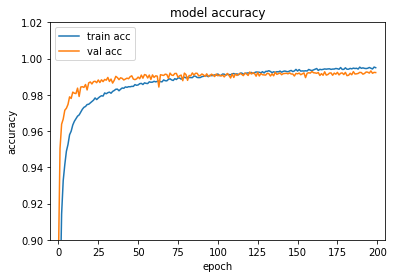

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.axis([-5, 205, 0.9, 1.02])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

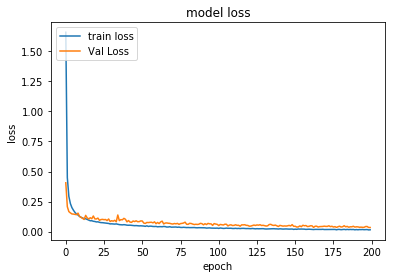

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0343929089479
Test accuracy: 0.9923


In [14]:
print(history.history)

{'val_loss': [0.40653614706993102, 0.20750638432502747, 0.16677108265161514, 0.15610301489830017, 0.14734129991531372, 0.14588665314912797, 0.14345645660161971, 0.14110142253041266, 0.1540587404370308, 0.12661819397807123, 0.11919104142785072, 0.11021218736767768, 0.10151773551106454, 0.13527405354976654, 0.11448239855766297, 0.10546509900093079, 0.11562566747665405, 0.10741465398073197, 0.13017371326684951, 0.10571266667246819, 0.10552256331443786, 0.11271991699934006, 0.094139088338613508, 0.10048934707641602, 0.10206901240348816, 0.099443925309181211, 0.10084864805340767, 0.092088146120309827, 0.10521691562533379, 0.084227293211221702, 0.090711918783187864, 0.086798495620489122, 0.09439757826328278, 0.081818796378374095, 0.13849887555837631, 0.091522142839431761, 0.099740176129341121, 0.098492389416694637, 0.11049852622747421, 0.10274960537552834, 0.081077237343788147, 0.092321660345792769, 0.079475770783424382, 0.077305141896009441, 0.088421876150369644, 0.08387534971237183, 0.0901

In [15]:

data = pd.DataFrame(history.history)
nome = 'DoubleConvMNISTNormDropFinalConv0Pad_t3' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)